In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('archive/book_sales.csv',
                index_col='Date',
                parse_dates=['Date'],
                ).drop('Paperback', axis=1)
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [76]:
type(df.Hardcover)

pandas.core.series.Series

In [77]:
df1 = pd.read_csv('archive/book_sales.csv')
df1.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


Two features are there in time series: time-step features and lag features

In [78]:
df['Time'] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [79]:
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [ ]:
sns.regplot?

In [81]:
df2 = df1.drop('Paperback', axis=1)
df2.head()

,Date,Hardcover
0,2000-04-01,139
1,2000-04-02,128
2,2000-04-03,172
3,2000-04-04,139
4,2000-04-05,191


In [82]:
df['Hardcover'] = np.array(df.Hardcover, dtype=int)
df['Time'] = np.array(df.Time, dtype=int)

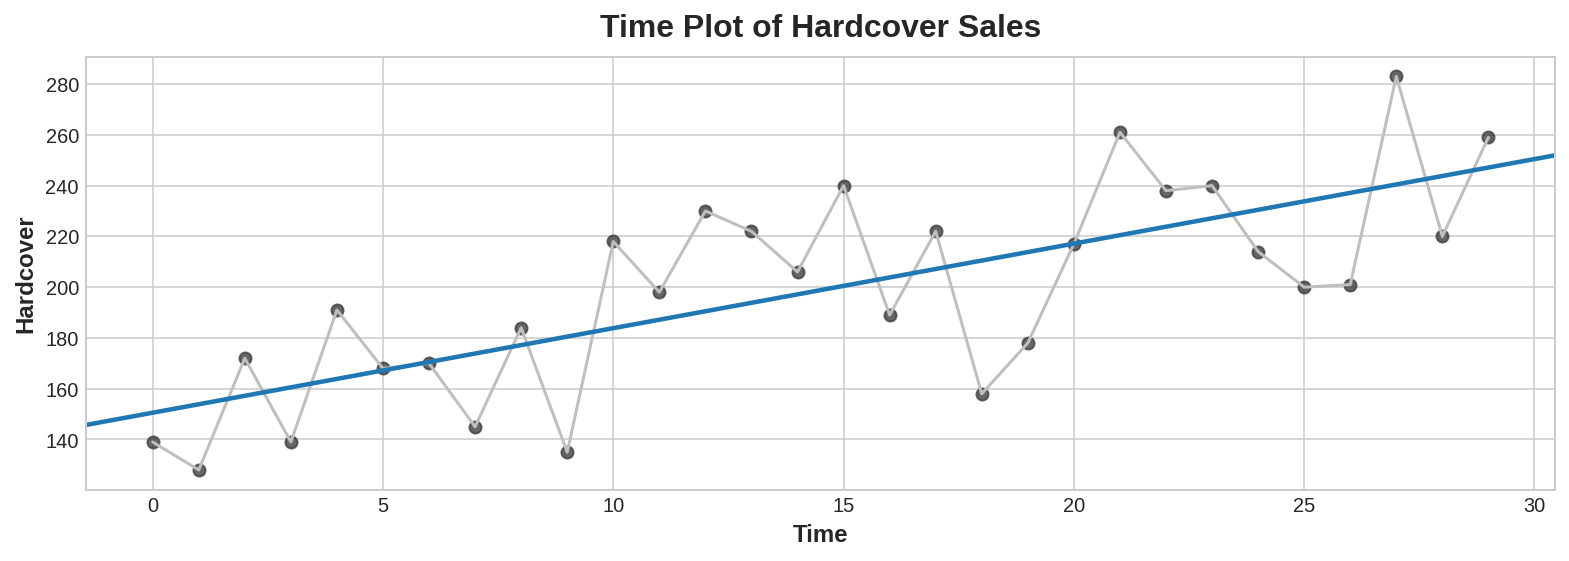

In [83]:
'''plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina' '''

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

<AxesSubplot:>

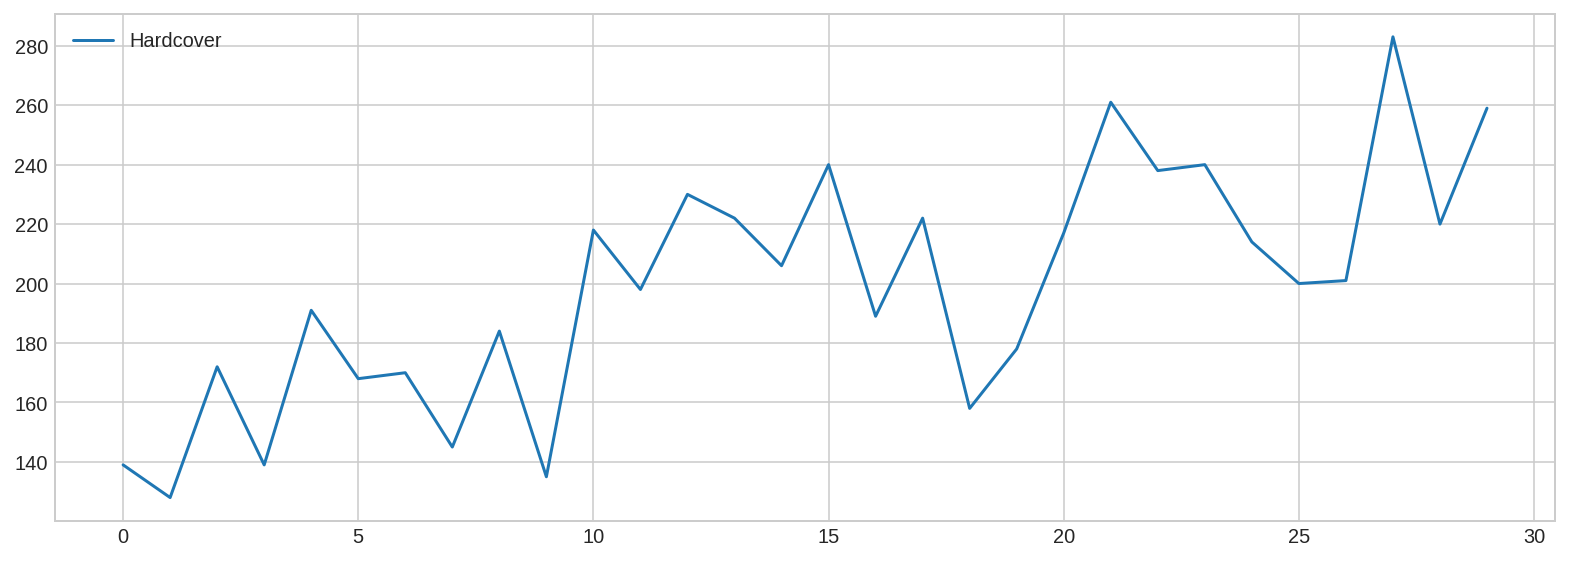

In [84]:
df2.plot()

In [85]:
df['lag_1'] = df.Hardcover.shift(1)
df.head()

,Hardcover,Time,lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0


In [86]:
df = df.reindex(columns=['Hardcover', 'lag_1'])
df.head()

,Hardcover,lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


In [87]:
df['Hardcover'] = np.array(df.Hardcover, dtype=float)
df['lag_1'] = np.array(df.lag_1, dtype=float)
df.head()

,Hardcover,lag_1
Date,,
2000-04-01,139.0,NaN
2000-04-02,128.0,139.0
2000-04-03,172.0,128.0
2000-04-04,139.0,172.0
2000-04-05,191.0,139.0


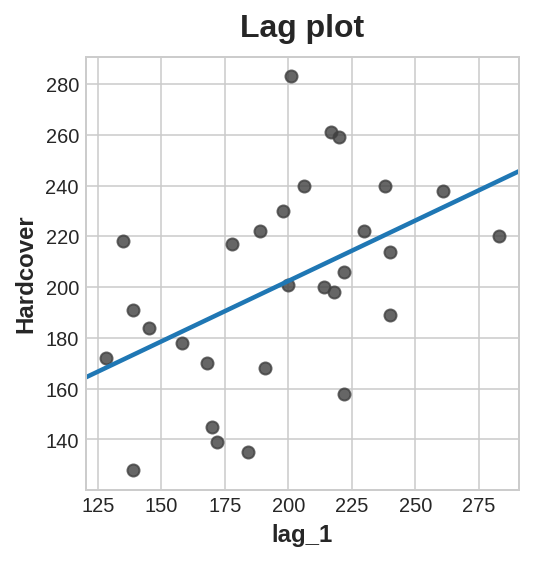

In [88]:
fig,ax = plt.subplots()
ax = sns.regplot(x='lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag plot');

### Tunnel Traffic

In [91]:
tunnel = pd.read_csv('archive/tunnel.csv',
                    index_col='Day',
                    parse_dates=['Day'])
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [92]:
tunnel = tunnel.to_period()      #converting to periods for the ease of work
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [95]:
type(tunnel.index)

pandas.core.indexes.period.PeriodIndex

In [96]:
df_tunnel = tunnel.copy()
df_tunnel['Time'] = np.arange(len(tunnel.index))
df_tunnel.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [113]:
from sklearn.linear_model import LinearRegression

X = df_tunnel.loc[:, ['Time']]
y = df_tunnel.loc[:, ['NumVehicles']]

In [117]:
y.shape

(747, 1)

In [119]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [162]:
df_tunnel['y_pred'] = model.predict(X)

In [166]:
df_tunnel['y_pred'].head()

Day
2003-11-01    98176.206344
2003-11-02    98198.703794
2003-11-03    98221.201243
2003-11-04    98243.698693
2003-11-05    98266.196142
Freq: D, Name: y_pred, dtype: float64

Text(0.5, 1.0, 'Time plot of tunnel traffic')

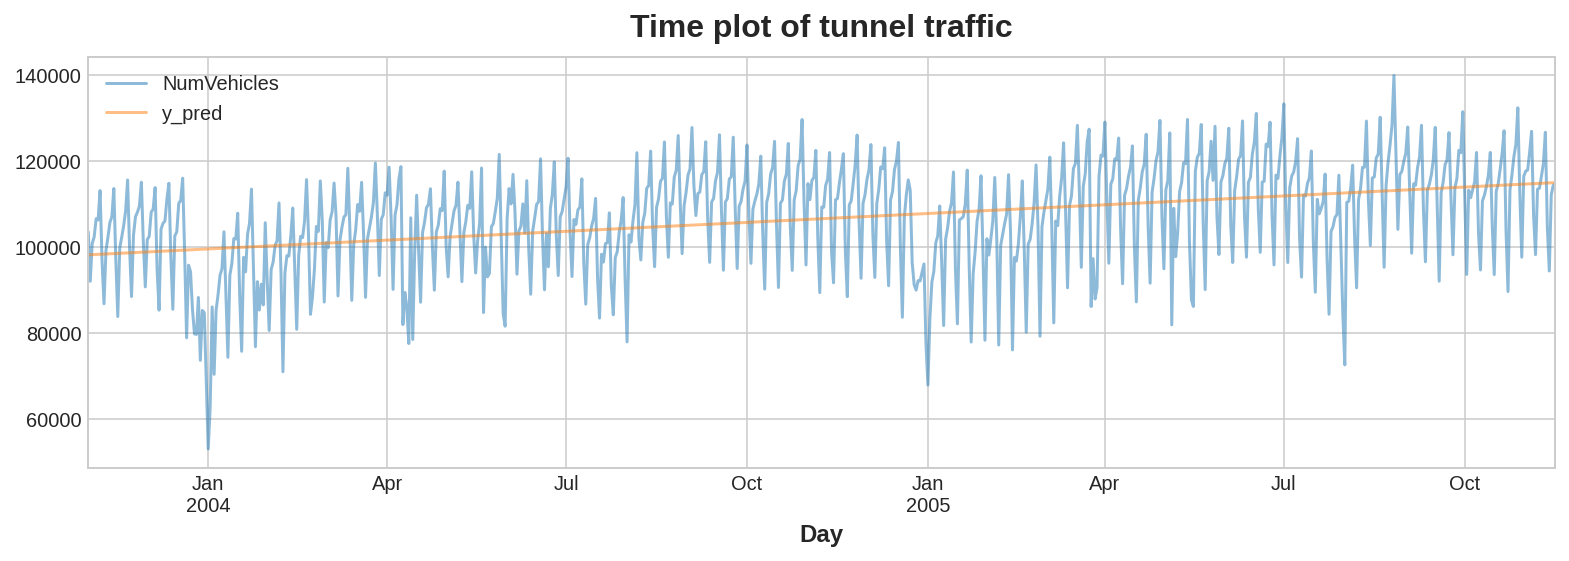

In [174]:
ax = df_tunnel[['NumVehicles', 'y_pred']].plot(alpha=0.5)
ax.set_title('Time plot of tunnel traffic')

In [176]:
df_tunnel['lag_1'] = df_tunnel['NumVehicles'].shift(1)
df_tunnel.head()

,NumVehicles,Time,y_pred,lag_1
Day,,,,
2003-11-01,103536,0,98176.206344,NaN
2003-11-02,92051,1,98198.703794,103536.0
2003-11-03,100795,2,98221.201243,92051.0
2003-11-04,102352,3,98243.698693,100795.0
2003-11-05,106569,4,98266.196142,102352.0


In [182]:
df_tunnel.dropna(inplace=True)

In [183]:
X = df_tunnel.loc[:, ['lag_1']]
y = df_tunnel.loc[:, ['NumVehicles']]

model = LinearRegression()
model.fit(X, y)
model

LinearRegression()

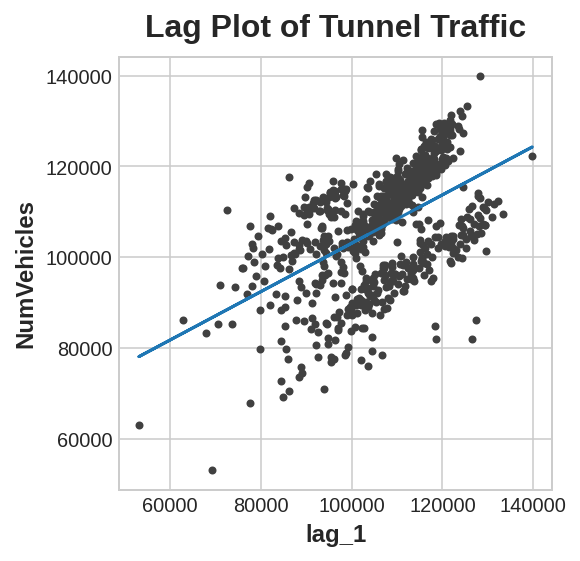

In [194]:
df_tunnel['y1_pred'] = model.predict(X)

fig, ax = plt.subplots()
ax.plot(df_tunnel['lag_1'], df_tunnel['NumVehicles'], '.', color='0.25')
ax.plot(df_tunnel['lag_1'], df_tunnel['y1_pred'])
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

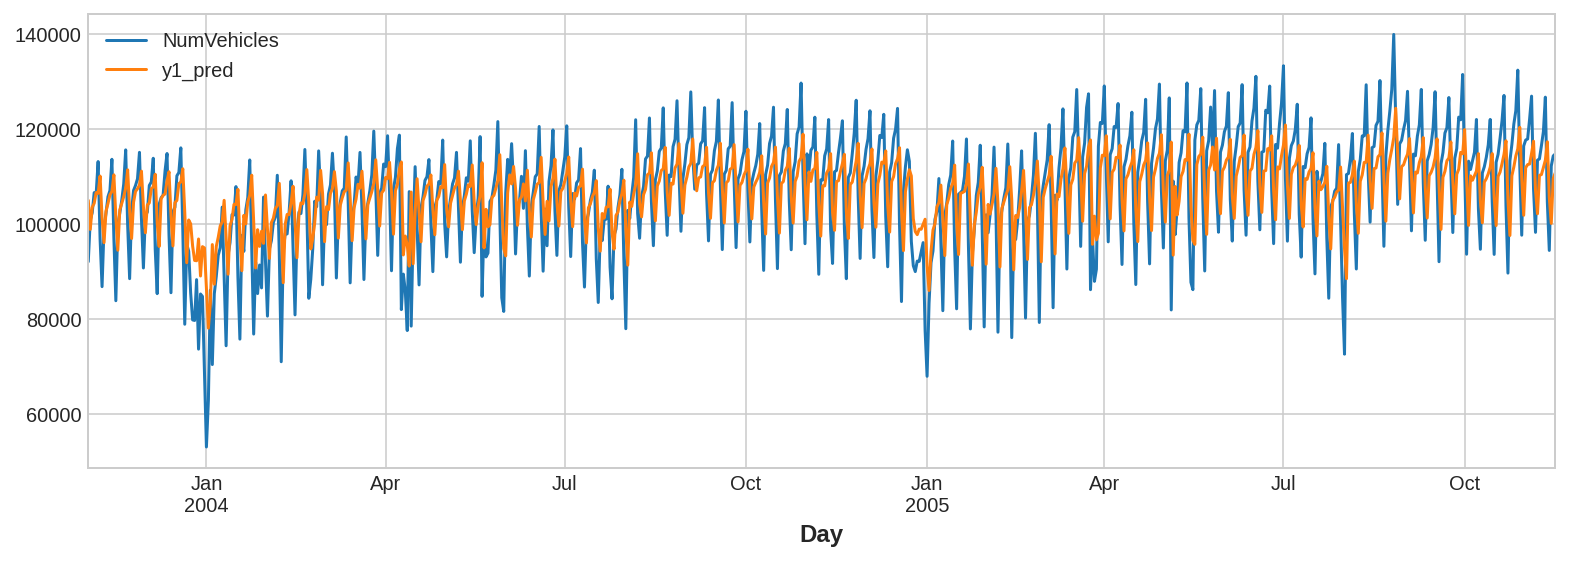

In [198]:
ax = df_tunnel[['NumVehicles', 'y1_pred']].plot()